<a href="https://colab.research.google.com/github/SantiagoRodriguez8881/Metodos1_JuanPabloMartinez_SantiagoRodriguez/blob/La-ramita-del-snat/Complementaria_05_SantiagoRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Complementaria métodos computacionales 1
>
> Semana 05

***

# 1) Newton-Raphson con parada

### 1.a) 1.5pt

Escriba una función llamada `find_root_iters(f,x0,h=1e-6,max_iters=50,atol=1e-5,rtol=1e-5)` que implemente el método de Newton Rhapson, es decir, que dada una función $f$ y un valor inicial $x_0$, encuentre un valor `root` tal que $f(x)\approx 0$.

* Aproxime la derivada de la función usando la derivada central: $f'(x) = \frac{f(x+h)-f(x-h)}{2h}$.
* El método debe parar cuando alcance un número dado de iteraciones `max_iters`.
    * Si antes de alcanzar esas iteraciones se alcanza la precisión adecuada, es decir $f(x)\approx 0$, el método debe parar prematuramente y retornar el $x$ actual.
    * En python, ese $\approx$ significa usar `np.isclose(0.,f(x),atol,rtol)`. La tolerancia absoluta `atol` y la relativa `rtol` entran por parámetro, y pueden tener el valor por defecto de `1e-5`.
* Debe retornar el número de iteraciones y el valor de $x$.

Use el siguiente código para verificar su solución:
Puede usar el siguiente código para probar su función

```python
from scipy.special import lambertw
np.isclose(
    find_root_iters(lambda x: x*np.exp(x)-5,0.4)[1],
    lambertw(5)
)
```


In [100]:
from logging import currentframe
import numpy as np
import matplotlib.pyplot as plt
def find_root_iters(f,x0,h=1e-3,max_iters=50,atol=1e-5,rtol=1e-5):
  n = 0
  while n < max_iters:
    central_derivate = (f(x0+h)-f(x0-h))/(2*h)
    x0 = x0 - f(x0)/central_derivate
    if np.isclose(0.,f(x0),atol = 1e-5, rtol = 1e-5):
      break
    n +=1
  return x0,n


In [94]:
from scipy.special import lambertw
np.isclose(
    find_root_iters(lambda x: x*np.exp(x)-5,0.4)[1],
    lambertw(5)
)

False

### 1.b) 0.5pt

Haga una función llamada `find_root` que llame a la función anterior, con todos sus argumentos, pero que sólo retorne el valor de $x$, sin retornar el número de iteraciones. Esta función debe poder recibir arrays como argumento para `x0`.

Para ello, use `@np.vectorize` como decorador en `find_root`.

Pruebe su función con este código
```python
from scipy.special import lambertw
all(np.isclose(
    find_root(lambda x: x**3-0.4,[0.4,0.9j]),
    [0.7368+0.j, -0.36840314+0.63809297j]
))
```

In [95]:
@np.vectorize
def find_root(f,x0,h=1e-6,max_iters=50,atol=1e-5,rtol=1e-5):
  return find_root_iters(f,x0,h,max_iters,atol,rtol)[0]

In [96]:
from scipy.special import lambertw
all(np.isclose(
    find_root(lambda x: x**3-0.4,[0.4,0.9j]),
    [0.7368+0.j, -0.36840314+0.63809297j]
))

True

### 1.c) Fractal de Newton 1.0 pt

Considerando la función $f(z) = z^3-(1+i)$, use el método de Newton Raphson para construir el fractal de Newton.

* Haga una grilla de valores iniciales complejos con parte real desde -2 hasta 2, y parte imaginaria desde -2i hasta 2i. Se recomienda usar `np.meshgrid`.
    * Haga un array de parte real `x` y parte imaginaria `y`, y con `x,y=np.meshgrid(x,y)`, puede armar la grilla compleja con `z=x+1j*y`.
    * Para hacer pruebas, use sólo 20 valores en cada array (`x` y `y`). Para el resultado final, 150 valores en cada array.

* Use la función del ejercicio anterior, `find_root`, para hallar las raíces cúbicas de (1+i) a las que converge cada condición inicial de la grilla.

* Use `np.angle` para hallar el ángulo de estas soluciones en los complejos. Grafique los valores de estos ángulos con `plt.imshow`.

Su imagen resultante se debe parecer a [esto](https://upload.wikimedia.org/wikipedia/commons/d/db/Julia_set_for_the_rational_function.png).

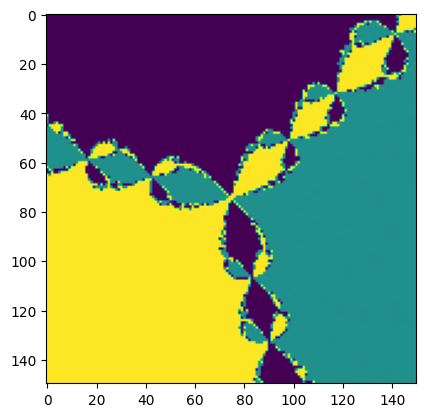

In [99]:
import matplotlib.pyplot as plt
x = np.linspace(-2,2,150)
y = np.linspace(-2,2,150)
x,y = np.meshgrid(x,y)
z = x+1j*y
a = find_root(lambda z: z**3-(1+1j),z)
plt.imshow(np.angle(a))

# 2) Interpolación de Lagrange con álgebra lineal

Dadas $n$ observaciones de datos $(x_0,y_0), (x_1,y_1), ... , (x_{n-1},y_{n-1})$, se quieren hallar $n$ coeficientes tales que para todo $k$,
$$
y_k = \sum_{i=0}^{n-1} a_i x_k^i
$$
Esto se puede representar matricialmente de esta manera:

$$
V \, \vec{a} = \vec{y}
$$

\begin{equation}
\begin{pmatrix}
x_0^{n-1} & ... & x_0^2 & x_0 & 1 \\
x_1^{n-1} & ... & x_0^2 & x_0 & 1 \\
... & ... & ... & ... \\
x_{n-1}^{n-1} & ... & x_{n-1}^2 & x_{n-1} & 1
\end{pmatrix}
\begin{pmatrix}
a_{n-1} \\
... \\
a_2 \\
a_1 \\
a_0
\end{pmatrix} = \begin{pmatrix}
y_0 \\
y_1 \\
... \\
y_{n-1}
\end{pmatrix}
\end{equation}

Esa matriz de arriba se conoce como la matriz de Vandermonde, y se puede generar con `np.vander`.

Los coeficientes de interpolación se obtienen como $\vec{a}=V^{-1}\vec{y}$. Use `np.linalg.inv` para invertir la matriz.

**2.0pt**

Encuentre de esta manera los coeficientes de interpolación $a_i$ para la función $f(x)=e^{-x^2}$, para los puntos `x = np.linspace(-5,5,n)`, para varios `n`, desde 5 hasta 11. Grafique para cada $n$ la función continua, los datos, y la función de interpolación (el polinomio con los coeficientes obtenidos) Responda: ¿Por qué la interpolación diverge entre punto y punto?

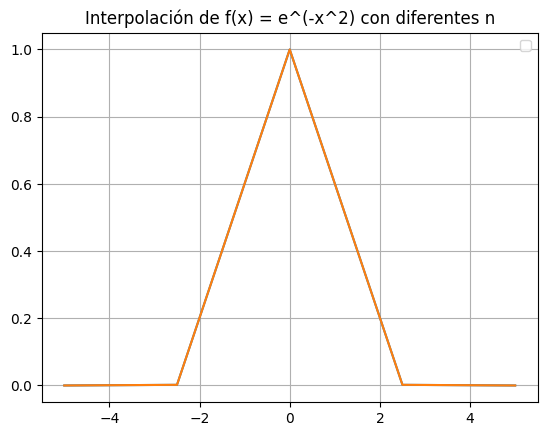

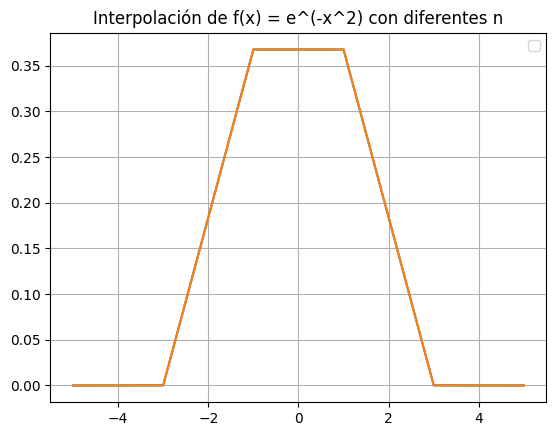

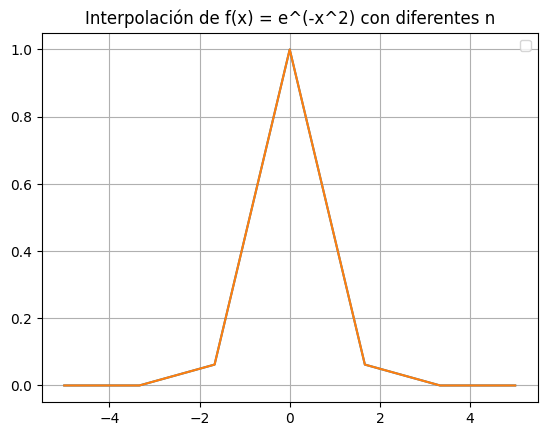

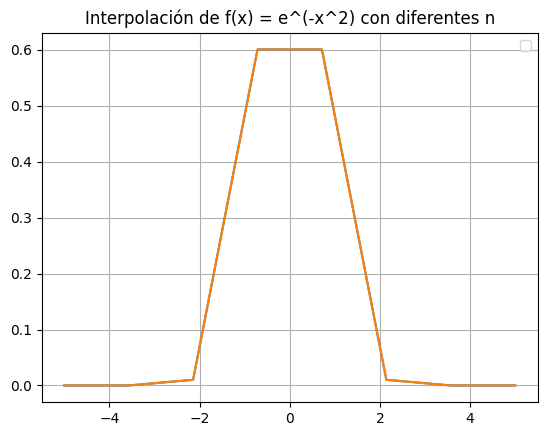

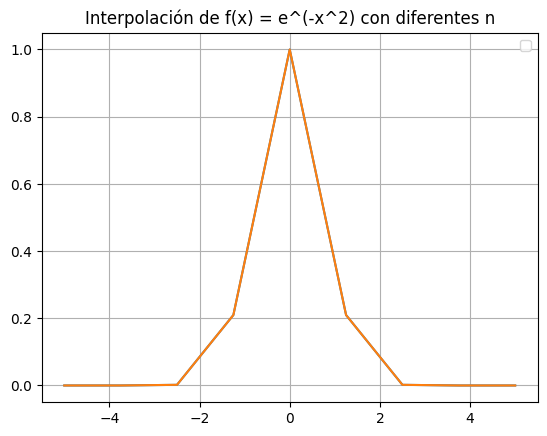

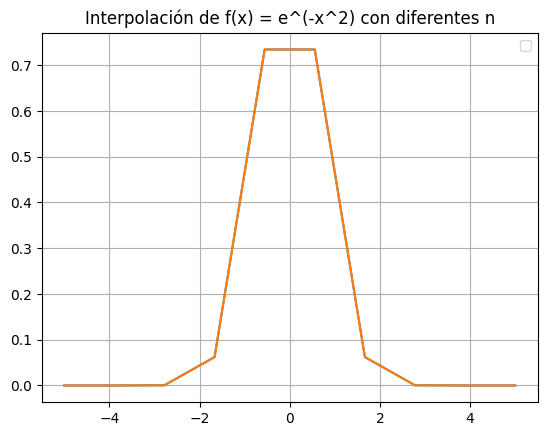

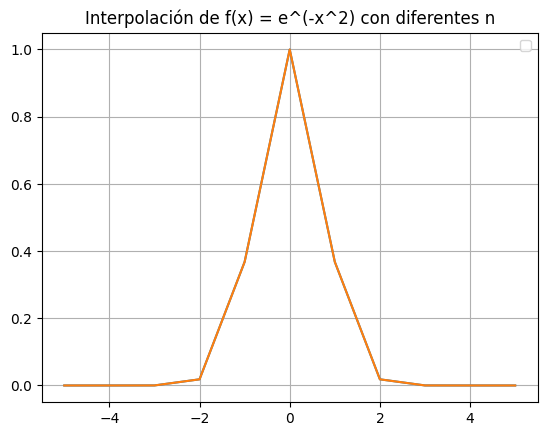

In [119]:
def puntos(n):
  x = np.linspace(-5,5,n)
  y = np.exp(-x**2)
  matrix = np.vander(x)
  a = np.linalg.inv(matrix) * y
  plt.plot(x,y)
  plt.plot(x,np.polyval(a,x))
  plt.title('Interpolación de f(x) = e^(-x^2) con diferentes n')
  plt.legend()
  plt.grid(True)
  plt.show()
for i in range(5,12):
  puntos(i)
